<a href="https://colab.research.google.com/github/Sangameshchandan/NYC-Taxi-Trip-Time-Prediction/blob/main/Sangamesh_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## 1. Installing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import geopandas as gpd


In [ ]:
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Loading the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Capstone Projects/2. NYC Taxi Trip Time Prediction/NYC Taxi Data.csv',parse_dates=['pickup_datetime','dropoff_datetime'])
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## 3. Data Wrangling/Explore the Dataset

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


We have 1458644 observations, 11 features, and our target variable is **trip_duration**

In [ ]:
#Checking for null values in dataset
data.isnull().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

No missing values in the dataset.

In [ ]:
#Check count of unique id's in the dataset
print("There are %d unique id's in dataset, which is equal to the number of records"%(data.id.nunique()))

There are 1458644 unique id's in dataset, which is equal to the number of records


In [ ]:
#Checking Date and Time range
print('Datetime range: {} to {}'.format(data.pickup_datetime.min(),data.dropoff_datetime.max()))

Datetime range: 2016-01-01 00:00:17 to 2016-07-01 23:02:03


Data is of 6 full months, from January 2016 to June 2016.

In [ ]:
#Checking no. of vendors
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [ ]:
#Checking Passenger count
print('Passenger Count: {} to {}'.format(data.passenger_count.min(),data.passenger_count.max()))

Passenger Count: 0 to 9


In [ ]:
#The distribution of Pickup and Drop Off day of the week
print(data['pickup_datetime'].nunique())
print(data['dropoff_datetime'].nunique())

1380222
1380377


There are many different pickup and drop off dates in these 2 columns.



## 4. Descriptive Statistics of the dataset

In [ ]:
#Summary statistics for the dataset
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# 5. Exploratory Data Analysis(EDA)

### Feature Engineering & Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


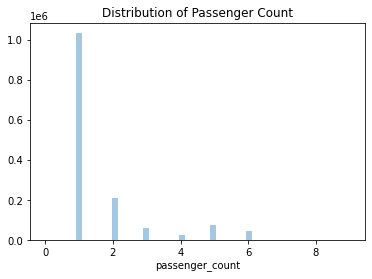

In [ ]:
#Passenger Count
sns.distplot(data['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

Here we can see that mostly 1 or 2 passengers go for the taxi. The large group of people travelling together is rare.

In [ ]:
#Creating pickup and dropoff day
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

#Creating pickup and dropoff month
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

#Creating pickup and dropoff hour
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

In [ ]:
data.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0


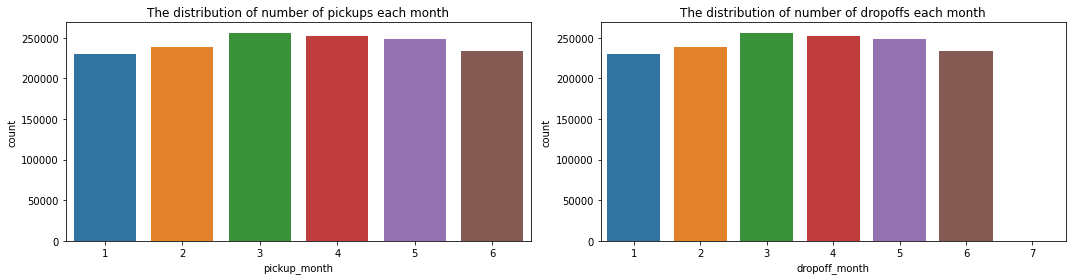

In [ ]:
#Plotting monthly Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_month',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each month')
sns.countplot(x='dropoff_month',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each month')
plt.tight_layout()

There is not difference in Pickup and dropoff month.




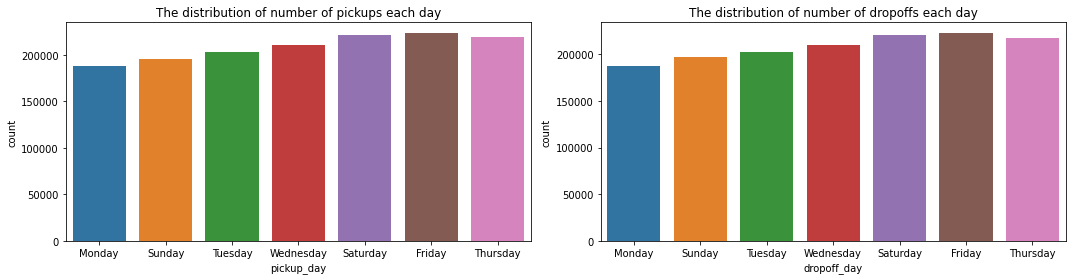

In [ ]:
#Plotting daily Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each day')
sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each day')
plt.tight_layout()

We can see most trips were taken on Friday & least trips were taken on Monday.



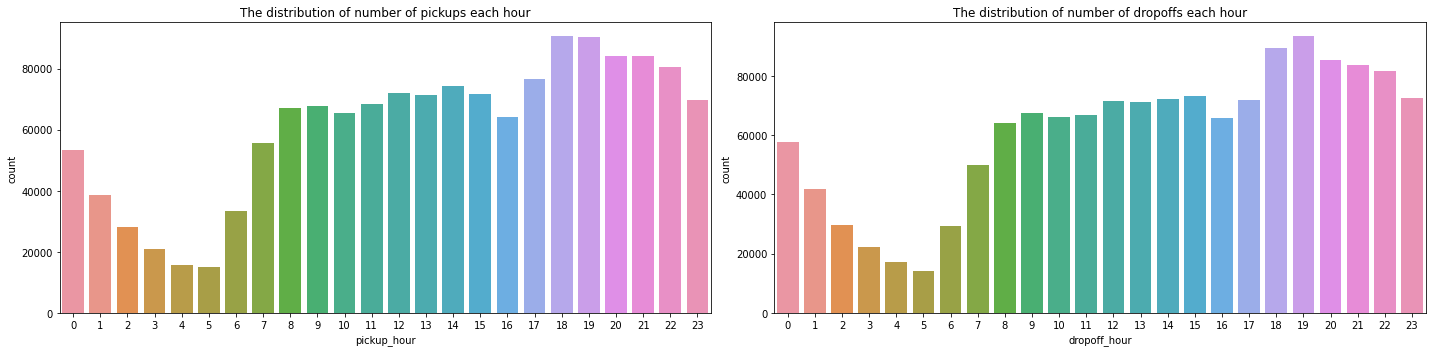

In [ ]:
#Plotting hourly Pickup and Dropoff trip distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='pickup_hour',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each hour')
sns.countplot(x='dropoff_hour',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each hour')
plt.tight_layout()

majority of the trip has been booked from 6PM to 10PM.

In [ ]:
#Creating a new column according to the traffic scenerio of New York
def rush_hour(hour):
    if hour.item()>=7 and hour.item()<=9:
        return 'rush_hour_morning(7-9)'
    elif hour.item()>9 and hour.item()<16:
        return 'normal_hour_afternoon(9-16)'
    elif hour.item()>=16 and hour.item()<=19:
        return 'rush_hour_evening(16-19)'
    elif hour.item()>19 and hour.item()<=23:
        return 'normal_hour_evining(19-23)'
    else:
        return 'latenight(23 onwards)'
data['traffic_scenerio_pickup']=data[['pickup_hour']].apply(rush_hour, axis=1)
data['traffic_scenerio_dropoff']=data[['dropoff_hour']].apply(rush_hour, axis=1)

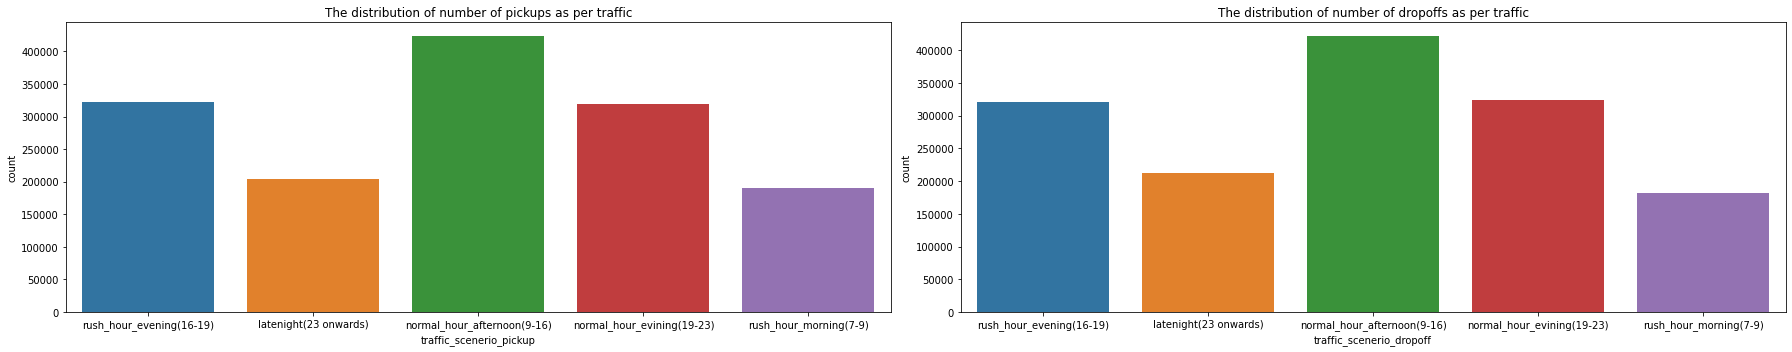

In [ ]:
#Plotting pickup and dropoff trip distribution as per traffic
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,5))
sns.countplot(x='traffic_scenerio_pickup',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups as per traffic')
sns.countplot(x='traffic_scenerio_dropoff',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs as per traffic')
plt.tight_layout()

### Distribution of the trip duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


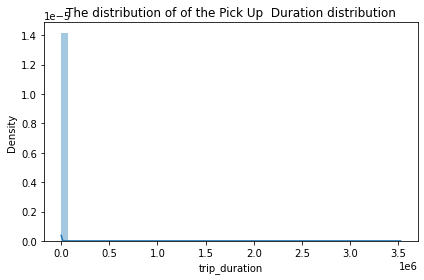

In [ ]:
sns.distplot(data['trip_duration'],kde=True)
plt.title('The distribution of of the Pick Up  Duration distribution')
plt.tight_layout()

It is showing right skewness. Hence,there are outliers, lets check it through boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

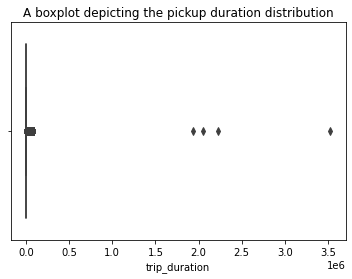

In [ ]:

sns.boxplot(data['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

We can see there are few outliers, we need to work on it.

In [ ]:
#Dropping trip_duration <1 min
data= data[data.trip_duration>60]


#Dropping trip_duration >2 Hrs
data= data[data.trip_duration<=7200]

Removed trip duration of less than 1 min and greater than 2 hrs because rare people can hire taxi for less than a min or more that 2 hrs in a city.

### Distribution of vendor_id

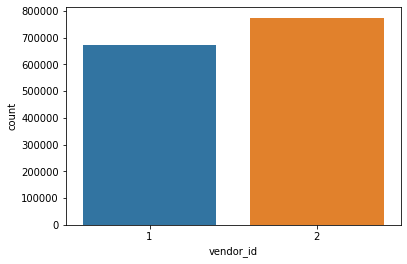

In [ ]:
sns.countplot(x='vendor_id',data=data)

The distribution of vendor id is not much different.

### Working with latitude and longitude.

In [ ]:
#Checking Longitude and Lattitude bounds available in the data
print('Longitude Bounds: {} to {}'.format(max(data.pickup_longitude.min(),data.dropoff_longitude.min()),max(data.pickup_longitude.max(),data.dropoff_longitude.max())))
print('Lattitude Bounds: {} to {}'.format(max(data.pickup_latitude.min(),data.dropoff_latitude.min()),max(data.pickup_latitude.max(),data.dropoff_latitude.max())))

Longitude Bounds: -121.9333038330078 to -61.33552932739258
Lattitude Bounds: 34.359695434570305 to 51.88108444213867


### The borders of NY City, in coordinates: city_long_border = (-74.03, -73.75) & city_lat_border = (40.63, 40.85)

In [ ]:
data = data[data['pickup_longitude'] <= -73.75]
data = data[data['pickup_longitude'] >= -74.03]
data = data[data['pickup_latitude'] <= 40.85]
data = data[data['pickup_latitude'] >= 40.63]
data = data[data['dropoff_longitude'] <= -73.75]
data = data[data['dropoff_longitude'] >= -74.03]
data = data[data['dropoff_latitude'] <= 40.85]
data = data[data['dropoff_latitude'] >= 40.63]

Limited the New York City boundary as per City Longitude and Latitude Boundary.

In [ ]:
#Getting distance(in km) from geographocal co-ordinates
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
    lat1, lon1, lat2, lon2 = columns
    R = 6372.8 # Earth radius in kilometers
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c

cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = data[cols].apply(lambda x: haversine(x),axis = 1)
data['distance_km'] = distances.copy()
data['distance_km'] = round(data.distance_km,2)

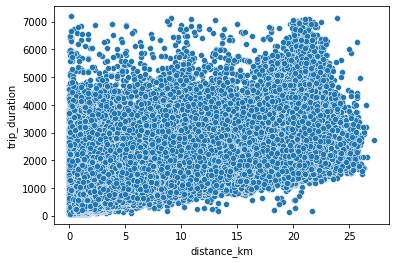

In [ ]:
sns.scatterplot(x='distance_km',y='trip_duration',data=data)

In [ ]:
#Removing distance Outliers
data = data[data['distance_km'] > 0]

Removed distance which have 0 value are cancelled trips.



In [ ]:
#Getting Speed(Km/h) of the taxi 
data['speed_km/h']= 3600*(data.distance_km/data.trip_duration)  #3600 to convert it from km/s to km/h

In [ ]:
#Checking Distance and Speed range
print('Distance Bounds: {} to {}'.format(data.distance_km.min(),data.distance_km.max()))
print('Speed Bounds: {} to {}'.format(data['speed_km/h'].min(),data['speed_km/h'].max()))

Distance Bounds: 0.01 to 27.2
Speed Bounds: 0.005539313740575473 to 584.0330578512397


In [ ]:
#Removing speed Outliers
data = data[data['speed_km/h'] > 0]
data = data[data['speed_km/h'] < 100]

Removed average speed equals to zero and more than 100, as it will be outlier.



In [ ]:
#Dropping passenger count=0
data= data[data.passenger_count>0]
data['passenger_count'].value_counts()

1    1009190
2     205377
5      76365
3      58594
6      47222
4      27730
Name: passenger_count, dtype: int64

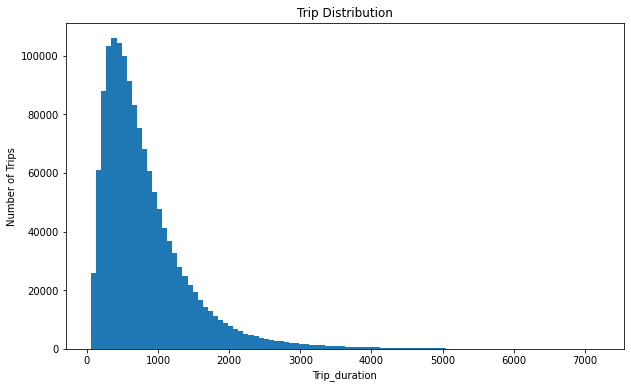

In [ ]:
#Plotting Trip Distribution
plt.figure(figsize=(10,6))
plt.hist(data.trip_duration, bins=100)
plt.xlabel('Trip_duration')
plt.ylabel('Number of Trips')
plt.title('Trip Distribution')
plt.show()

The distribution is skewed so we will apply log transform.

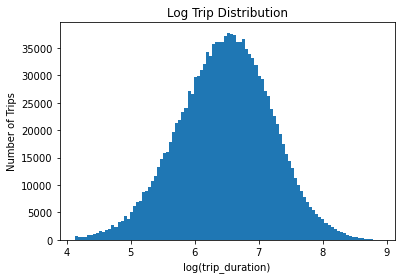

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


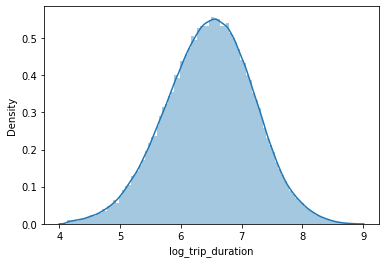

In [ ]:
#Applying Feature Scaling in trip_duration caloumn to normalize the data
data['log_trip_duration']= np.log1p(data['trip_duration'])
plt.hist(data['log_trip_duration'].values, bins=100)
plt.title('Log Trip Distribution')
plt.xlabel('log(trip_duration)')
plt.ylabel('Number of Trips')
plt.show()
sns.distplot(data["log_trip_duration"], bins =100)

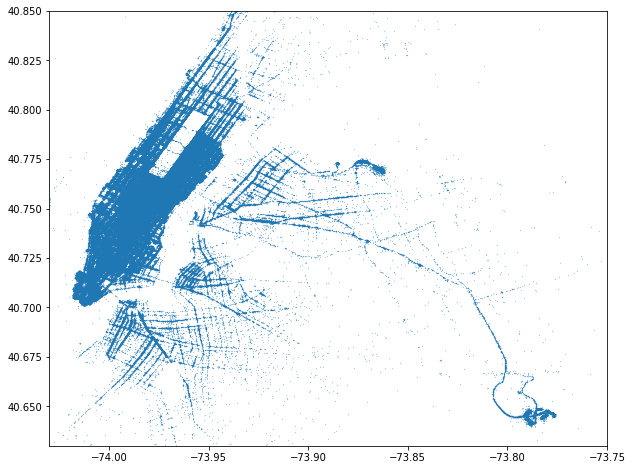

In [ ]:

#Visualizing Passenger road map for picking up
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(data['pickup_longitude'],data['pickup_latitude'], s=0.02, alpha=1)

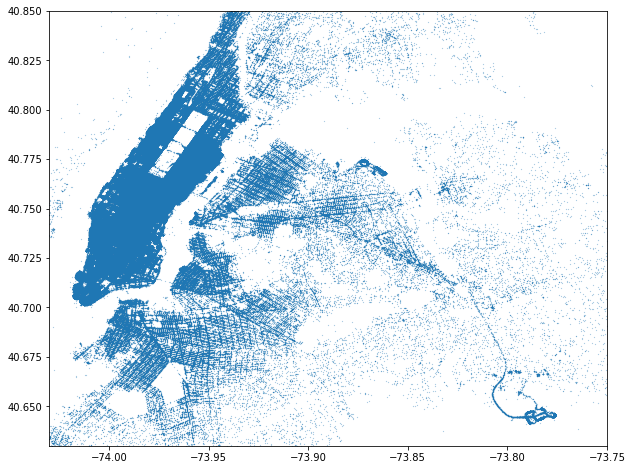

In [ ]:
#Visualizing Passenger road map for dropoff
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(data['dropoff_longitude'],data['dropoff_latitude'], s=0.02, alpha=1)

In [ ]:
#Converting Data to Geo Dataframe for pickup 
gdf=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['pickup_longitude'],data['pickup_latitude']))

In [ ]:
#Geometry point has been generated for pickup
gdf.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,traffic_scenerio_pickup,traffic_scenerio_dropoff,distance_km,speed_km/h,log_trip_duration,geometry
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,rush_hour_evening(16-19),rush_hour_evening(16-19),1.50,11.868132,6.122493,POINT (-73.98215 40.76794)
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,latenight(23 onwards),latenight(23 onwards),1.81,9.828054,6.498282,POINT (-73.98042 40.73856)


In [ ]:
gdf.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'traffic_scenerio_pickup', 'traffic_scenerio_dropoff', 'distance_km',
       'speed_km/h', 'log_trip_duration', 'geometry'],
      dtype='object')

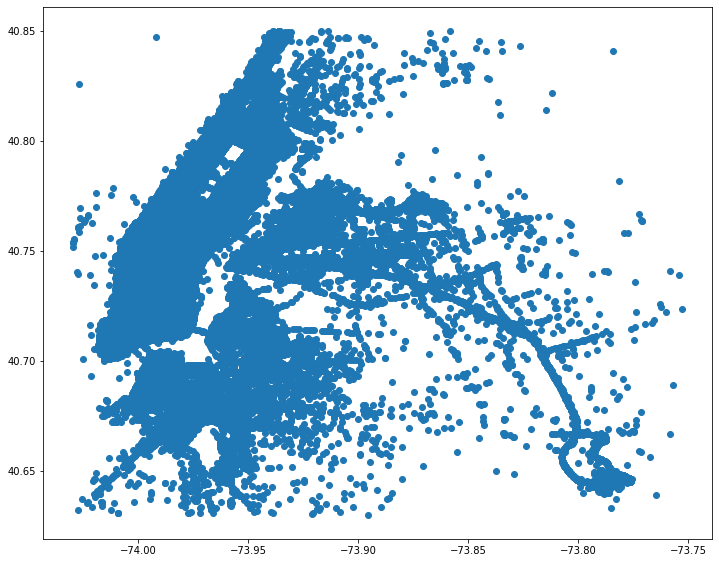

In [ ]:
#Visulizing pickup points with geopandas
gdf.plot(figsize=(12,10))

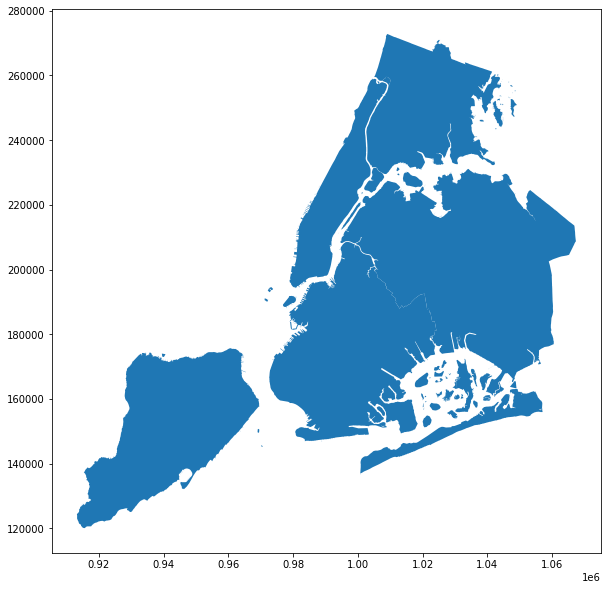

In [ ]:
#Getting New York City map from Geopandas
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = nyc.plot(figsize=(12, 10))

Done overlapping of datapoints to the map.



### Categorical Encoding - One Hot Encoding

In [ ]:
#Applying one hot encoding to the catagorical variables
taxi_vendor=pd.get_dummies(data['vendor_id'], prefix='vendor_id',drop_first= True)

taxi_pax=pd.get_dummies(data['passenger_count'], prefix='passenger',drop_first= True)

taxi_store_and_fwd_flag=pd.get_dummies(data['store_and_fwd_flag'], prefix='store_and_fwd_flag',drop_first= True)

taxi_pickup_day=pd.get_dummies(data['pickup_day'], prefix='pickup_day',drop_first= True)

taxi_dropoff_day=pd.get_dummies(data['dropoff_day'], prefix='dropoff_day',drop_first= True)

taxi_pickup_month=pd.get_dummies(data['pickup_month'], prefix='pickup_month',drop_first= True)

taxi_dropoff_month=pd.get_dummies(data['dropoff_month'], prefix='dropoff_month',drop_first= True)

taxi_pickup_traffic_scenerio=pd.get_dummies(data['traffic_scenerio_pickup'], prefix='pickup_',drop_first= True)

taxi_dropoff_traffic_scenerio=pd.get_dummies(data['traffic_scenerio_dropoff'], prefix='dropoff_',drop_first= True)

In [ ]:
#Adding encoded columns to data.
data=pd.concat([data,taxi_pax,taxi_vendor,taxi_store_and_fwd_flag,taxi_pickup_day,taxi_dropoff_day,taxi_pickup_month,
                   taxi_dropoff_month,taxi_pickup_traffic_scenerio,taxi_dropoff_traffic_scenerio],axis=1)

In [ ]:
data.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,traffic_scenerio_pickup,traffic_scenerio_dropoff,distance_km,speed_km/h,log_trip_duration,geometry,passenger_2,passenger_3,passenger_4,passenger_5,passenger_6,vendor_id_2,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup__normal_hour_afternoon(9-16),pickup__normal_hour_evining(19-23),pickup__rush_hour_evening(16-19),pickup__rush_hour_morning(7-9),dropoff__normal_hour_afternoon(9-16),dropoff__normal_hour_evining(19-23),dropoff__rush_hour_evening(16-19),dropoff__rush_hour_morning(7-9)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Monday,Monday,3,3,17,17,rush_hour_evening(16-19),rush_hour_evening(16-19),1.5,11.868132,6.122493,POINT (-73.98215 40.76794),0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data.shape

(1424478, 61)

In [ ]:
##Dropping columns from dataset which are not useful.
data=data.drop(['id','vendor_id','passenger_count','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude',
                      'dropoff_longitude','dropoff_latitude','log_trip_duration','speed_km/h','store_and_fwd_flag','traffic_scenerio_pickup',
                      'traffic_scenerio_dropoff','pickup_month','dropoff_month','pickup_day','dropoff_day','pickup_hour','dropoff_hour','geometry','dropoff_month_7'],axis=1)

In [ ]:
data.columns

Index(['trip_duration', 'distance_km', 'passenger_2', 'passenger_3',
       'passenger_4', 'passenger_5', 'passenger_6', 'vendor_id_2',
       'store_and_fwd_flag_Y', 'pickup_day_Monday', 'pickup_day_Saturday',
       'pickup_day_Sunday', 'pickup_day_Thursday', 'pickup_day_Tuesday',
       'pickup_day_Wednesday', 'dropoff_day_Monday', 'dropoff_day_Saturday',
       'dropoff_day_Sunday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday',
       'dropoff_day_Wednesday', 'pickup_month_2', 'pickup_month_3',
       'pickup_month_4', 'pickup_month_5', 'pickup_month_6', 'dropoff_month_2',
       'dropoff_month_3', 'dropoff_month_4', 'dropoff_month_5',
       'dropoff_month_6', 'pickup__normal_hour_afternoon(9-16)',
       'pickup__normal_hour_evining(19-23)',
       'pickup__rush_hour_evening(16-19)', 'pickup__rush_hour_morning(7-9)',
       'dropoff__normal_hour_afternoon(9-16)',
       'dropoff__normal_hour_evining(19-23)',
       'dropoff__rush_hour_evening(16-19)', 'dropoff__rush_hour_morning

## 6. Spliting Dataset into Train and Test

In [ ]:

#Assigning X and y variables
X = data.drop('trip_duration',1)
y = data['trip_duration']

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## 7. Using Algorithms for train_test_split.

### 1. Building Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics

#RMSE score 
lr_rmse = np.sqrt(metrics.mean_squared_error(lr_pred,y_test))
print('RMSE score:' ,lr_rmse)

RMSE score: 385.34727896445276


In [ ]:
#R2 score
lr_r2score = metrics.r2_score(lr_pred,y_test)
print('R2 score:', lr_r2score)

R2 score: 0.42839588905539394


In [ ]:
#Train Score
lr_train=lr.score(X_train,y_train)
print('Train Score:',lr_train)


#Test Score
lr_test=lr.score(X_test,y_test)
print('Test Score:', lr_test)

Train Score: 0.6372581055161195
Test Score: 0.6361417244238469


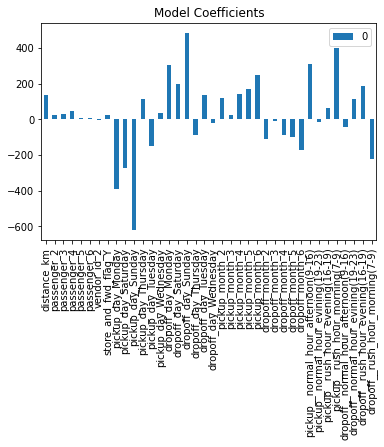

In [ ]:
coef1 = pd.DataFrame(lr.coef_,index=X_train.columns)
coef1.plot(kind='bar', title='Model Coefficients')

We can see that the regression model with all the columns performed well except few columns

### 2.Building Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [ ]:
#RMSE score 
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
print('RMSE score:' ,dt_rmse)


#R2 score
dt_r2score = metrics.r2_score(dt_pred,y_test)
print('R2 score:', dt_r2score)

RMSE score: 453.2078283800463
R2 score: 0.47631299249048953


In [ ]:
#Train Score
dt_train=dt.score(X_train,y_train)
print('Train Score:',dt_train)


#Test Score
dt_test=dt.score(X_test,y_test)
print('Test Score:', dt_test)

Train Score: 0.9095794957255137
Test Score: 0.4967051696807448


### 3. Building AdaBoost Regressor Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_pred=ab.predict(X_test)

In [ ]:
#RMSE score 
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
print('RMSE score:' ,ab_rmse)

#R2 score
ab_r2score = metrics.r2_score(ab_pred,y_test)
print('R2 score:', ab_r2score)

RMSE score: 591.4548308997828
R2 score: -0.05864840688162554


In [ ]:
#Train Score
ab_train=ab.score(X_train,y_train)
print('Train Score:',ab_train)


#Test Score
ab_test=ab.score(X_test,y_test)
print('Test Score:', ab_test)

Train Score: 0.14496943192525968
Test Score: 0.1428223665241245


### 4. Building GradientBoosting Regressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [ ]:
#RMSE score 
gb_rmse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
print('RMSE score:' ,gb_rmse)

#R2 score
gb_r2score = metrics.r2_score(gb_pred,y_test)
print('R2 score:', gb_r2score)

RMSE score: 349.19559770137704
R2 score: 0.5548472087460754


In [ ]:
#Train Score
gb_train=gb.score(X_train,y_train)
print('Train Score:',gb_train)


#Test Score
gb_test=gb.score(X_test,y_test)
print('Test Score:', gb_test)

Train Score: 0.7031059615820996
Test Score: 0.701210601860578


### 5. Building XGB Regressor Model

In [ ]:
from xgboost.sklearn import XGBRegressor

xgb= XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[10:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#RMSE score 
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
print('RMSE score:' ,xgb_rmse)

#R2 score
xgb_r2score = metrics.r2_score(xgb_pred,y_test)
print('R2 score:', xgb_r2score)

RMSE score: 349.19856326818956
R2 score: 0.5548333853933849


In [ ]:
#Train Score
xgb_train=xgb.score(X_train,y_train)
print('Train Score:',xgb_train)


#Test Score
xgb_test=xgb.score(X_test,y_test)
print('Test Score:', xgb_test)

Train Score: 0.7031016302172828
Test Score: 0.7012055268614004


## Model Performance Assessment

In [ ]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['RMSE Score','R2 Score','Train Score','Test Score'],'Linear Regression':[lr_rmse,lr_r2score,lr_train,lr_test],
          'Decision Tree Regressor':[dt_rmse,dt_r2score,dt_train,dt_test],'AdaBoost Regressor':[ab_rmse,ab_r2score,ab_train,ab_test],
          'GradientBoosting Regressor':[gb_rmse,gb_r2score,gb_train,gb_test],'XGBoost Regressor':[xgb_rmse,xgb_r2score,xgb_train,xgb_test]}

In [ ]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Linear Regression,Decision Tree Regressor,AdaBoost Regressor,GradientBoosting Regressor,XGBoost Regressor
0,RMSE Score,385.347279,453.207828,591.454831,349.195598,349.198563
1,R2 Score,0.428396,0.476313,-0.058648,0.554847,0.554833
2,Train Score,0.637258,0.909579,0.144969,0.703106,0.703102
3,Test Score,0.636142,0.496705,0.142822,0.701211,0.701206


Looking at the above Performance Matrix we can say thay XGBoost and GradientBoosting are the best model for this dataset.

# Conclusion
In this project ,covered various aspects of the Machine learning development cycle amd observed that the data exploration and variable analysis is a very important for the cycle and should be done for thorough understanding of the data. Also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further performed feature engineering to filter and gather only the optimal features which are more significant.